In [89]:
from networkx import *
import matplotlib.pyplot as plt
from collections import defaultdict

import numpy as np
import pandas as pd
import community
import networkx as nx
url="http://www-personal.umich.edu/~mejn/netdata/football.zip"

import urllib
import io
import zipfile

football = urllib.urlopen(url)  # open URL
f=io.BytesIO(football.read()) # read into BytesIO "file"
football.close()

zf = zipfile.ZipFile(f) # zipfile object
txt=zf.read('football.txt').decode() # read info file
gml=zf.read('football.gml').decode() # read gml data
# throw away bogus first line with # from mejn files
gml=gml.split('\n')[1:]
G=parse_gml(gml) # parse gml data
g=nx.Graph(G)


In [90]:
zf = zipfile.ZipFile(f) # zipfile object
txt=zf.read('football.txt').decode() # read info file
gml=zf.read('football.gml').decode() # read gml data
# throw away bogus first line with # from mejn files
gml=gml.split('\n')[1:]
G=parse_gml(gml) # parse gml data
g=nx.Graph(G)


In [91]:
print nx.info(g)


Name: ()
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


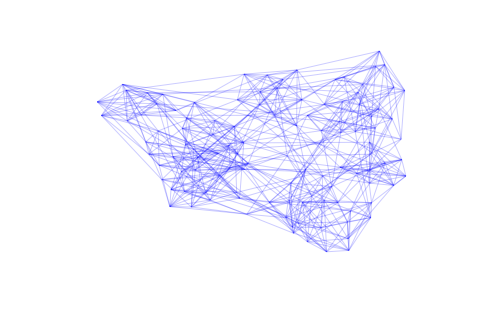

In [92]:
nx.draw_spring(g,node_size=0,edge_color='b', lable=True, alpha=.2, font_size=10)
plt.show()

In [93]:
#Since NCAA imposes rules restricting the number of games each team can play, either 11 or 12, the teams in this network
#all have similar degree. As the graphs, we can have the same result. 
def trim_nodes(G,d):
    Gt=G.copy()
    dn=nx.degree(Gt)
    for n in Gt.nodes():
        if dn[n]<=d:
            Gt.remove_node(n)
    return Gt

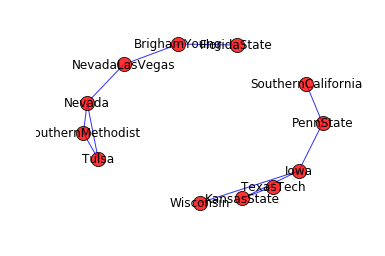

12

In [94]:
# There are 12 teams play 12 games
Gt = trim_nodes(g,11)
plt.axis('off')

nx.draw(Gt, node_size=200, node_color='r', edge_color='b', alpha=0.8,with_labels = True)
plt.show()
len(Gt)


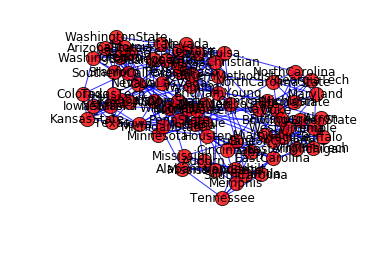

78

In [95]:
# There are 66 teams play 11 games.
Gt = trim_nodes(g,10)
plt.axis('off')

nx.draw(Gt, node_size=200, node_color='r', edge_color='b', alpha=0.8,with_labels = True)
plt.show()
len(Gt)

In [96]:
deg=nx.degree(G)
min(deg.values())

7

In [97]:
max(deg.values())

12

In [98]:
# This function returns a sorted degree list- can help us to spot the Teams which played the mose of games
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda(k,v): (-v,k))
    return ms

In [99]:
# Top 15 teams in the list
ds = sorted_map(deg)
ds[:10]


[(u'BrighamYoung', 12),
 (u'FloridaState', 12),
 (u'Iowa', 12),
 (u'KansasState', 12),
 (u'Nevada', 12),
 (u'NevadaLasVegas', 12),
 (u'PennState', 12),
 (u'SouthernCalifornia', 12),
 (u'SouthernMethodist', 12),
 (u'TexasTech', 12)]

In [100]:
# The Top 12 users in this dataset are playing the most games.


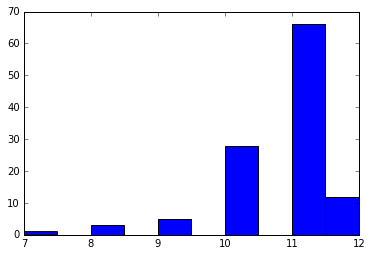

In [101]:
h = plt.hist(deg.values())
plt.show(h)

# This histogram is highly skewd left.

In [102]:

#g = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(G.edges()).items())
#edge_weights = g.edges(data=True)

nx.set_edge_attributes(G,'weight',1)
c =nx.closeness_centrality(G)

In [103]:
cs=sorted_map(c)
cs[:10]

[(u'LouisianaTech', 0.4367816091954023),
 (u'Navy', 0.4351145038167939),
 (u'Tulsa', 0.43018867924528303),
 (u'Indiana', 0.42696629213483145),
 (u'PennState', 0.4253731343283582),
 (u'ArkansasState', 0.42379182156133827),
 (u'BrighamYoung', 0.42379182156133827),
 (u'Cincinnati', 0.42379182156133827),
 (u'Wisconsin', 0.42379182156133827),
 (u'Wyoming', 0.42379182156133827)]

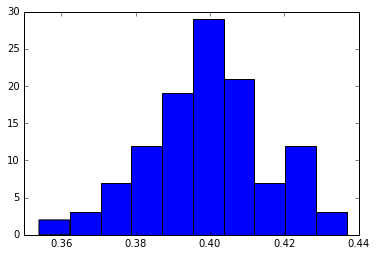

In [104]:
h = plt.hist(c.values())
plt.show(h)

In [105]:
b=nx.betweenness_centrality(G)
bs=sorted_map(b)
bs[:10]


[(u'NotreDame', 0.03353295672662948),
 (u'BrighamYoung', 0.03248994918389482),
 (u'Navy', 0.02916105326422372),
 (u'LouisianaTech', 0.028822823420770936),
 (u'CentralMichigan', 0.025186801970868814),
 (u'NewMexicoState', 0.024139419776449258),
 (u'Cincinnati', 0.023836354939100652),
 (u'KansasState', 0.023070098856845606),
 (u'Alabama', 0.023046321730608013),
 (u'Wyoming', 0.022213447427560148)]

In [106]:
dc=nx.degree_centrality(G)
dcs=sorted_map(dc)
dcs[:10]

[(u'BrighamYoung', 0.10526315789473684),
 (u'FloridaState', 0.10526315789473684),
 (u'Iowa', 0.10526315789473684),
 (u'KansasState', 0.10526315789473684),
 (u'Nevada', 0.10526315789473684),
 (u'NevadaLasVegas', 0.10526315789473684),
 (u'PennState', 0.10526315789473684),
 (u'SouthernCalifornia', 0.10526315789473684),
 (u'SouthernMethodist', 0.10526315789473684),
 (u'TexasTech', 0.10526315789473684)]

In [107]:
e=nx.eigenvector_centrality(G)
es=sorted_map(e)
es[:10]


[(u'Nevada', 0.12768424714143733),
 (u'SouthernMethodist', 0.12257733284057698),
 (u'Tulsa', 0.12128957246239933),
 (u'SouthernCalifornia', 0.1207252812631775),
 (u'SanJoseState', 0.1199035354268502),
 (u'FresnoState', 0.11956928362396665),
 (u'Hawaii', 0.1176960436025193),
 (u'Rice', 0.11724691716369856),
 (u'TexasElPaso', 0.11647241977171087),
 (u'Wisconsin', 0.11630296390411189)]

In [181]:

##		0	=	Atlantic	Coast
##		1	=	Big	East
##		2	=	Big	Ten
##		3	=	Big	Twelve
##		4	=	Conference	USA
##		5	=	Independents
##		6	=	Mid-American
##		7	=	Mountain	West
##		8	=	Pacific	Ten
##		9	=	Southeastern
##10	=	Sun	Belt
##11	=	Western	Athletic.		


ACC=[]
BigEast=[]
Big10=[]
Big12=[]
ConferenceUSA=[]
Independants=[]
MidAmerican=[]
MountainWest=[]
PacTen=[]
SEC=[]
SunBelt=[]
WesternAthletic= []

node_color = []

for i,j in g.nodes_iter(data = True):
    if j['value'] == 0:
        ACC.append(i)
        node_color.append('r')
    elif j['value'] == 1:
        BigEast.append(i)
        node_color.append('y')
    else:
        node_color.append('g')
        


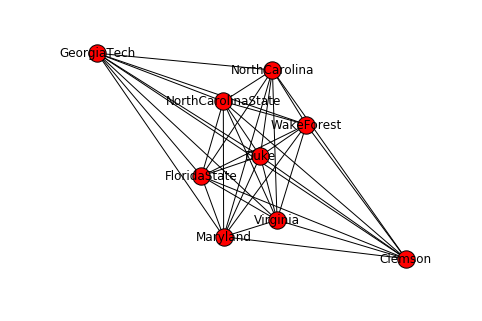

In [182]:
g_ACC= g.subgraph(ACC)

nx.draw(g_ACC, with_labels=True)
plt.show()

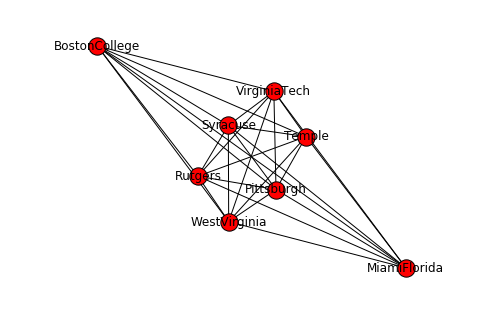

In [183]:
g_BigEast= g.subgraph(BigEast)

nx.draw(g_BigEast, with_labels=True)
plt.show()

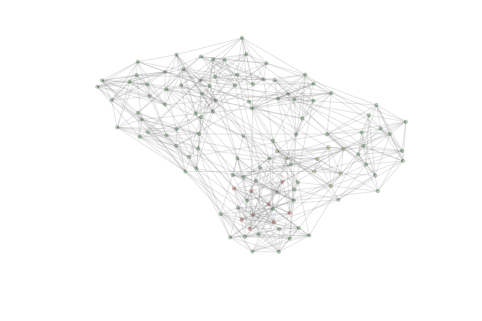

In [187]:
nx.draw_spring(g,node_size=10,edge_color='grey', lable=True, alpha=.2, font_size=10, node_color = node_color )
plt.show()